# Superstore Marketing Campaign - Analysis (Part1)

**Data :** https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset

**Background-** A big box is planning the year-end sale. They want to launch a new offer - the Gold Membership, which offers a 20% discount on all purchases, for only $499, or $999 on other days. It will only be valid for existing customers and the phone call campaign is currently being planned for them. Management believes that the best way to reduce the cost of the campaign is to create a predictive model that will rank customers who are likely to purchase the offer.


**Objective -** The hypermarket wants to predict the likelihood that the customer will give a positive response and wants to identify the various factors that affect the customer's response. You need to analyze the provided data to identify these factors, then create a prediction model to predict the likelihood of a customer giving a positive response.

** Analysis Report :** The analysis report is at the end of the notebook

### Columns explanations

**Dt_Customer** -> date of registration of the customer in the company

**Recency** -> number of days since last purchase

**MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts** -> the amount spent on products... in the last 2 years

**NumDealsPurchases** -> number of purchases made with discount

**NumWebPurchases** -> number of purchases made through the company's website

**NumWebVisitsMonth** -> number of **visits** to the company's website in the last month

**Complain** -> if the customer has complained in the last 2 years**


### Our Target

Response -> Target variable - 1 if the customer accepted the offer during the last campaign, 0 otherwise

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import datetime
import numpy as np
%matplotlib inline 

data = pd.read_csv('/Users/nathan/Desktop/Étude Perso/DataSience/Machine Learning Project/superstore_data.csv')
data2 = data.copy()
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [2]:
data.shape

(2240, 22)

In [3]:
data.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [4]:
data[data.duplicated()].count().sum()     # no duplicate value

0

In [5]:
data.dtypes.value_counts()

int64      18
object      3
float64     1
dtype: int64

In [6]:
data.isnull().sum()    # only income column has missing values (24). 

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

## Cleaning Dataset

In [7]:
# change Dt_Customer column to datetime

data['Dt_Customer'] = pd.to_datetime(data.Dt_Customer)      
data.dtypes.value_counts()

int64             18
object             2
float64            1
datetime64[ns]     1
dtype: int64

In [8]:
# add age column instead of date of birth

currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
year = date.strftime("%Y")

In [9]:
data['Customer_age'] = int(year) - data.Year_Birth 
data.drop('Year_Birth', axis = 1, inplace = True)

In [10]:
data.head()

,Id,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_age
0,1826,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,...,189,218,1,4,4,6,1,1,0,53
1,1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,0,37,1,7,3,7,5,1,0,62
2,10476,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,2,30,1,3,2,5,2,0,0,65
3,1386,Graduation,Together,32474.0,1,1,2014-11-05,0,10,0,...,0,0,1,1,0,2,7,0,0,56
4,5371,Graduation,Single,21474.0,1,0,2014-08-04,0,6,16,...,0,34,2,3,1,2,7,1,0,34


## Age variable

In [11]:
data.describe().Customer_age

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Customer_age, dtype: float64

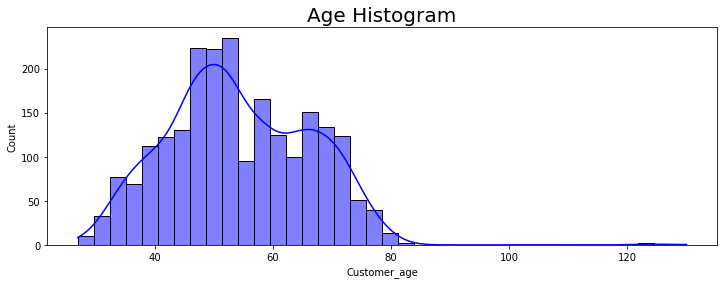

In [12]:
plt.figure(figsize = [12,4])
sns.histplot(data.Customer_age, kde = True, color = 'blue')
plt.title('Age Histogram', size = 20);

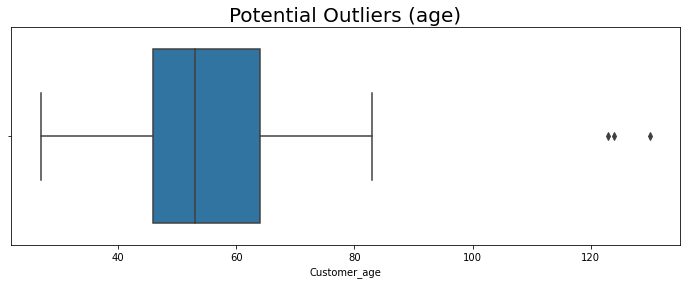

In [13]:
plt.figure(figsize = [12,4])
sns.boxplot(data.Customer_age)
plt.title('Potential Outliers (age)', size = 20);

In [14]:
# z-score function
def z_score(column, threshold) -> list :
    
    outlier = []
    mean = column.mean()
    std = column.std()
    
    for element in column:
        zscore = (element - mean) / std
        if np.abs(zscore) > threshold :
            outlier.append(element)
    return outlier

In [15]:
z_score(data['Customer_age'], 3)

[130, 124, 123]

In [16]:
for i, element in enumerate(data.Customer_age):    # take index of thoses values
      if element > 110:                        # we see that we have 3 outliers (age of 130, 124, 123) which are impossible (incoherent).
        print(i, element)   

513 130
827 124
2233 123


In [17]:
data.drop([513, 827, 2233], axis = 0, inplace = True)

In [18]:
data_positive_response = data[data.Response == 1]
data_negative_response = data[data.Response == 0]

In [19]:
data_positive_response.describe().Customer_age

count    334.000000
mean      53.583832
std       12.398192
min       27.000000
25%       44.000000
50%       52.000000
75%       64.000000
max       80.000000
Name: Customer_age, dtype: float64

In [20]:
data_negative_response.describe().Customer_age

count    1903.000000
mean       54.188650
std        11.576456
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max        83.000000
Name: Customer_age, dtype: float64

The age of an average / median of people who gave a positive answer is similar to those who gave a negative answer and is 53-54.

### Does the number of purchases through a specific channel influence membership in the 'Gold' subscription?

As column we have `NumWebPurchases`,`NumCatalogPurchases`, `NumStorePurchases`:
* Number of purchases by the company's website.
* Number of purchases made using the catalog (purchase of goods to be mailed)
* Number of purchases made at the company store.

In [21]:
data.groupby('Response')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].agg(['mean', 'median', 'max'])

NumWebPurchases            NumCatalogPurchases             \
                    mean median max                mean median max   
Response                                                             
0               3.914346    3.0  27            2.392013    1.0  28   
1               5.071856    5.0  11            4.203593    4.0  11   

         NumStorePurchases             
                      mean median max  
Response                               
0                 5.741461    5.0  13  
1                 6.095808    6.0  13

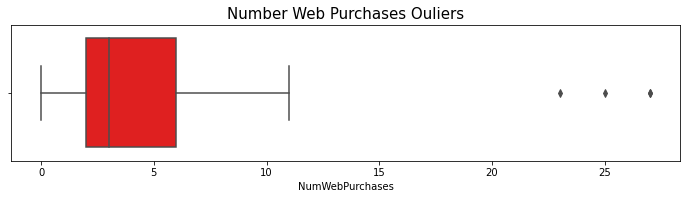

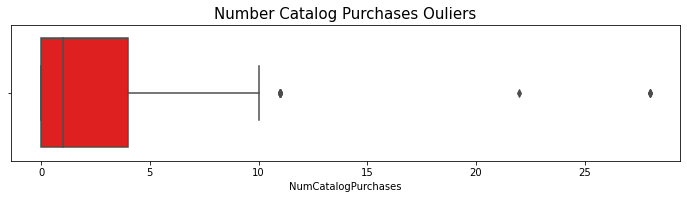

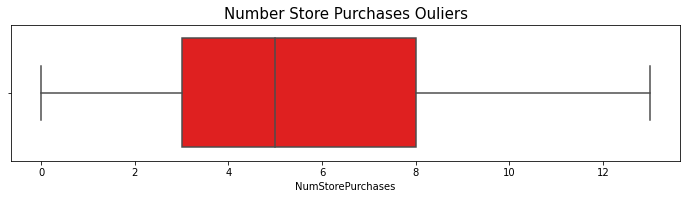

In [22]:
plt.figure(figsize = [12,2.5])
sns.boxplot(data_negative_response.NumWebPurchases, color = 'red')
plt.title('Number Web Purchases Ouliers', size = 15)

plt.figure(figsize = [12,2.5])
plt.title('Number Catalog Purchases Ouliers', size = 15)
sns.boxplot(data_negative_response.NumCatalogPurchases, color = 'red')

plt.figure(figsize = [12,2.5])
plt.title('Number Store Purchases Ouliers', size = 15)
sns.boxplot(data_negative_response.NumStorePurchases, color = 'red');  

We can see that in both categories: 'NumWeb Purchases', 'Num Catalog Purchases', we have outliers, which leads us to measure the median and not the mean

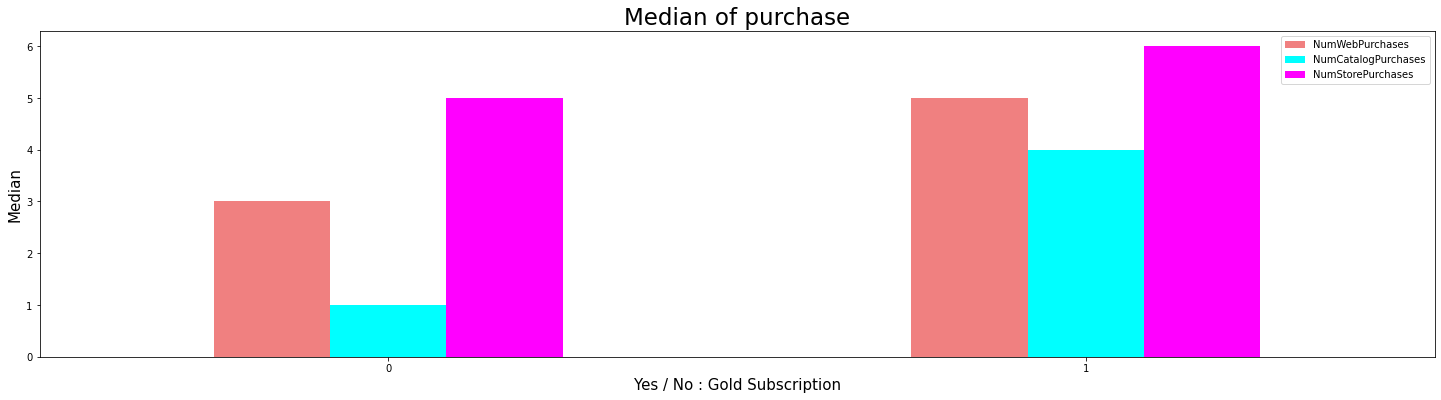

In [23]:
num_purchases = data.groupby('Response')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].agg('median')
num_purchases.plot.bar(figsize=(25,6), color = ['lightcoral', 'cyan', 'magenta'])
plt.xlabel('Yes / No : Gold Subscription',size = 15)
plt.ylabel('Median', size = 15)
plt.title('Median of purchase', size = 23)
plt.xticks(rotation = 360);

## Complain / Purchase
### Those who complained still have several purchases in their assets?

In [24]:
data.Complain.unique()

array([0, 1])

In [25]:
data.Complain.value_counts()

0    2217
1      20
Name: Complain, dtype: int64

In [26]:
data.groupby('Complain')['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'].agg(['mean'])

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
,mean,mean,mean
Complain,,,
0,4.090663,2.667569,5.797925
1,3.700000,2.100000,5.400000


We can see that those who complained still bought products and the number of purchases they made is very similar to those who did not complain (it would seem that people's complaints did not have a influence on their future purchase)

## Complain / Response

### Is there a correlation between these two variables?

Explanation of the `pearson` metric:

The smaller the value of p, the lower the probability of making an error in rejecting the null hypothesis. A limit value of 0.05 is often used. That is, you can reject the null hypothesis if the p-value is less than 0.05.


The Pearson coefficient measures the level of correlation between the two variables. It returns a value between -1 and 1. If it is close to 1 it means that the variables are correlated, close to 0 that the variables are uncorrelated and close to -1 that they are negatively correlated. 

In [27]:
from scipy.stats import pearsonr

pd.DataFrame(pearsonr(data.Complain, data.Response), index = ['Test Coeff', 'P-Value'], columns=['Test Result'])

,Test Result
Test Coeff,0.000185
P-Value,0.993035


**Conclusion:** the p-value is greater than 5%. We deduce that the variables are not dependent on each other (can be independent). The coefficient has a value of 0.000185 which means that the variables are not correlated (which the p-Value was able to show us above).

## Dt_Customer / Purchase

### What are the most prolific months? / Are the oldest customers the most buyers?

In [28]:
data.Dt_Customer.dt.year.unique()  # about what year are we talking about

array([2014, 2013, 2012])

In [29]:
data['Total_Purchases'] = data[['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumDealsPurchases']].apply(sum, axis = 1) # all purchases

In [30]:
data['Year_Subscription'] = data.Dt_Customer.dt.year
data['Month_Subscription'] = data.Dt_Customer.dt.month_name()

In [31]:
data.head()

,Id,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_age,Total_Purchases,Year_Subscription,Month_Subscription
0,1826,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,...,4,4,6,1,1,0,53,15,2014,June
1,1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,7,3,7,5,1,0,62,18,2014,June
2,10476,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,3,2,5,2,0,0,65,11,2014,May
3,1386,Graduation,Together,32474.0,1,1,2014-11-05,0,10,0,...,1,0,2,7,0,0,56,4,2014,November
4,5371,Graduation,Single,21474.0,1,0,2014-08-04,0,6,16,...,3,1,2,7,1,0,34,8,2014,August


In [32]:
data.groupby('Month_Subscription')['Total_Purchases'].sum().sort_values(ascending = False)

Month_Subscription
August       3210
October      3052
January      3017
December     2991
November     2903
February     2886
May          2883
March        2845
September    2544
April        2498
June         2353
July         2084
Name: Total_Purchases, dtype: int64

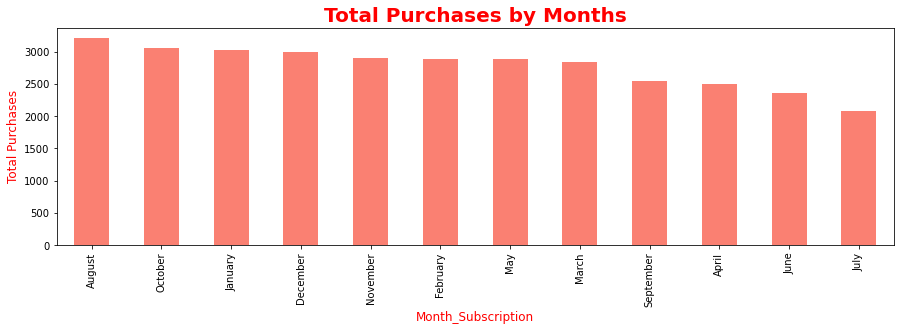

In [33]:
plt.figure(figsize = [15,4])
plt.title('Total Purchases by Months', size = 20, color = 'red',  fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Total Purchases', size = 12, color = 'red')
plt.xlabel('Month Subscription', size = 12, color = 'red')
data.groupby('Month_Subscription')['Total_Purchases'].sum().sort_values(ascending = False).plot.bar(color = 'salmon');

**Conclusion:** We see that the month of August (we can also include the months October, January and December) is a month where customers make the most purchases. It would therefore be interesting to offer the 'Gold' offer in one of these months (months to avoid: June - July).

Year_Subscription
2013    17827
2012     8319
2014     7120
Name: Total_Purchases, dtype: int64


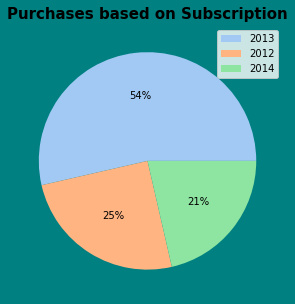

In [34]:
print(data.groupby('Year_Subscription')['Total_Purchases'].sum().sort_values(ascending = False))

fig, ax = plt.subplots(figsize = [15,5])
colors = sns.color_palette('pastel')[0:5]
ax.pie(data.groupby('Year_Subscription')['Total_Purchases'].sum().sort_values(ascending = False), colors = colors, autopct='%.0f%%')
# fig.set_facecolor('lightgray')
fig.set_facecolor('#008080')  # vert bleuté
ax.set_title('Purchases based on Subscription', size = 15, fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(['2013', '2012', '2014']);

**Conclusion:** We can see that customers who signed up in 2013 have more than twice as many orders in their assets as those who signed up in 2012 or 2014

## MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts

### What are the most purchased products in the last two years?

MntFruits            58767
MntSweetProducts     60553
MntFishProducts      83939
MntMeatProducts     373393
MntWines            680038
dtype: int64


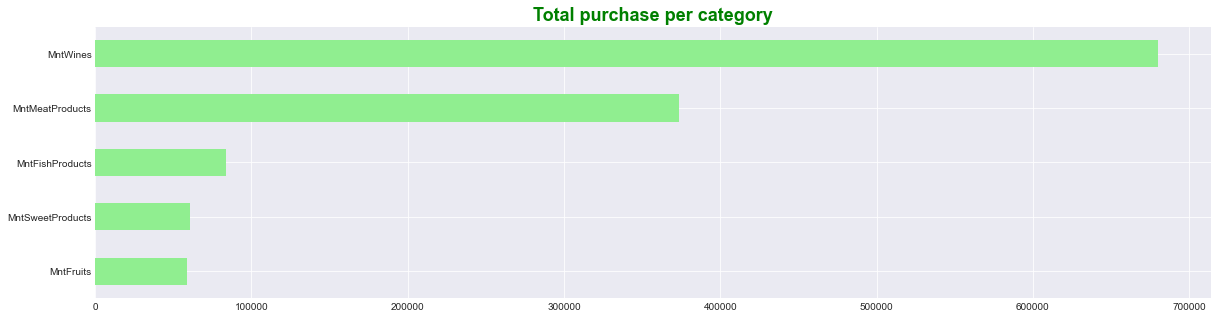

In [35]:
products = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].apply(sum).sort_values(ascending = True)
print(products)
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = [20,5])
plt.title('Total purchase per category', size = 18, fontdict={'fontsize': 14, 'fontweight': 'bold'}, color = 'green')
products.plot.barh(color = 'lightgreen');

**Conclusion:** We note that wines are by far the most purchased products followed by meat (almost twice a month) followed by far by fish, sweet products and fruits.

### From which category come the customers who have joined the 'Gold' project the most?

In [36]:
cat = data.groupby('Response')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum()
cat

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
Response,,,,,
0,512135,46007,275079,66554,47649
1,167903,12760,98314,17385,12904


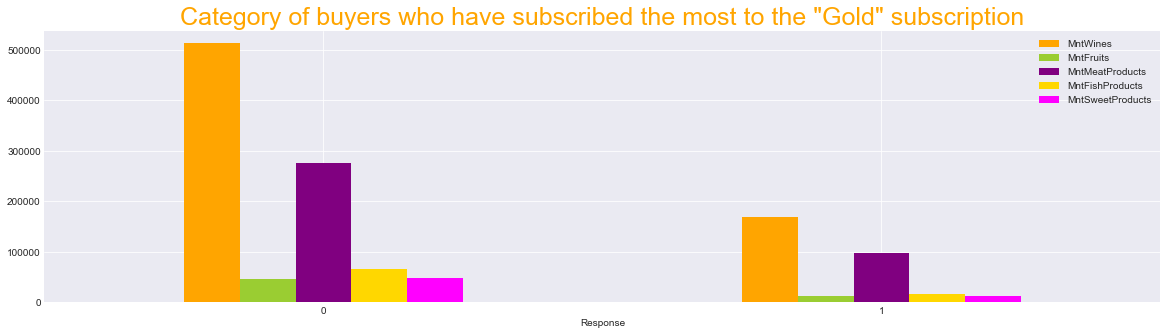

In [58]:
cat.plot.bar(figsize = [20,5], color = ['orange', 'yellowgreen', 'purple','gold', 'fuchsia'])
plt.xticks(rotation = 360)
plt.title('Category of buyers who have subscribed the most to the "Gold" subscription', 
          size = 25, color = 'orange', 
          fontdict={'fontsize': 14, 'fontweight': 'medium'},
          fontfamily = 'arial');

**Conclusion:** We see that those who joined the 'Gold' project follow the logic of the biggest buyers. That is to say it is the consumers of wine in the first place then those of meat...

## Income / Response

### Are those with the highest income those who will necessarily subscribe to the 'Gold' project?

In [38]:
data.Income.describe()

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

In [39]:
data_negative_response.Income.median(), data_positive_response.Income.median()

(50150.0, 64090.0)

In [40]:
data.Income.max(), data_negative_response.Income.max(), data_positive_response.Income.max()

(666666.0, 666666.0, 105471.0)

We see that the people who have the most substantial income are those who have subscribed to the 'Gold' project. On average, people with incomes over $64,000 are more likely to join. **Beware, however, of this conclusion and the extreme values because, for example, the person with the highest income from this table has not taken out a subscription.**

In [41]:
count = 0
for element in data_negative_response.Income.to_list():
    if element  > data_positive_response.Income.median():
        count += 1
print(f'{count} people have incomes above the median salary of those who joined the Gold project : {round((count/data.shape[0])*100, 2)}.%')

537 people have incomes above the median salary of those who joined the Gold project : 24.01.%


### Are those who have the biggest income the biggest buyers?

In [42]:
data.Income.median()

51373.0

In [43]:
income_above_median = data.query('Income > Income.median()')
income_under_median = data.query('Income < Income.median()')

In [44]:
total = lambda x : x.sum()

print(f'The total purchases of those with income above the median is: {total(income_above_median.Total_Purchases)} purchases')
print(f'The total purchases of those with income under the median is: {total(income_under_median.Total_Purchases)} purchases')
print(f'Those with income above the median buy {round(total(income_above_median.Total_Purchases) / total(income_under_median.Total_Purchases),2)} as much')

The total purchases of those with income above the median is: 22411 purchases
The total purchases of those with income under the median is: 10528 purchases
Those with income above the median buy 2.13 as much


We see that people with high incomes have the most purchases under their belt.

## Kidhome / MntProducts

### Do children / teenagers impact customers on their consumption?

### 1.Kids

In [45]:
data.Kidhome.unique()

array([0, 1, 2])

In [46]:
kid = data.groupby('Kidhome')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum()
kid

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
Kidhome,,,,,
0,582604,50791,327850,72507,52301
1,93844,7651,43919,11061,8026
2,3590,325,1624,371,226


In [47]:
percent_puchase_kid = lambda x : (data[data['Kidhome'] == x].Total_Purchases.sum() / data.Total_Purchases.sum()) * 100

for i in range(3):
    print(f'The total purchases of customers who have {i} children constitute only {round(percent_puchase_kid(i), 2)}.% of the sum of purchases.')

The total purchases of customers who have 0 children constitute only 70.27.% of the sum of purchases.
The total purchases of customers who have 1 children constitute only 28.32.% of the sum of purchases.
The total purchases of customers who have 2 children constitute only 1.41.% of the sum of purchases.


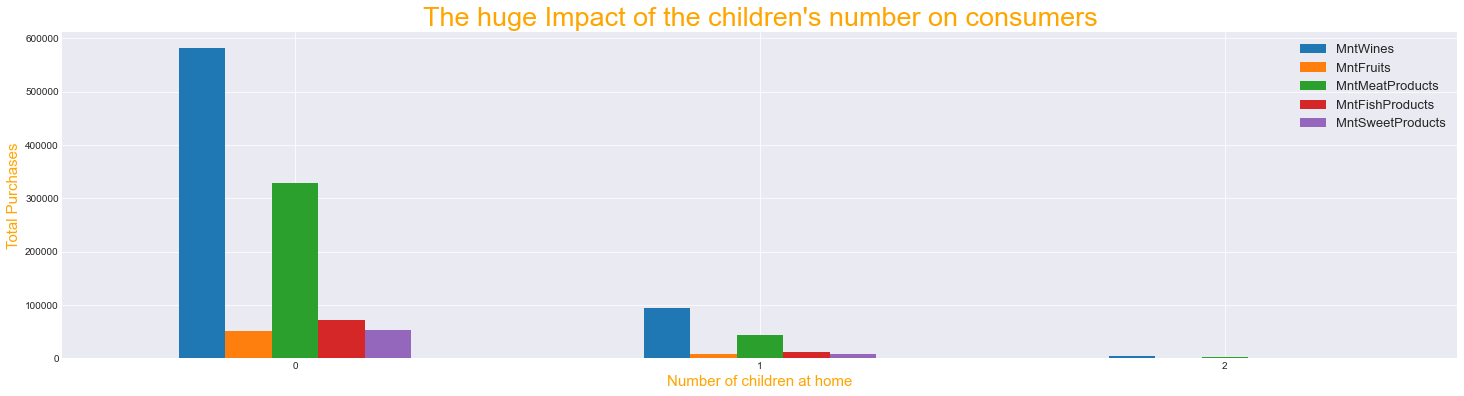

In [48]:
kid.plot.bar(figsize = [25,6])
plt.xticks(rotation = 360)
plt.xlabel('Number of children at home', size = 15, color = 'orange')
plt.ylabel('Total Purchases', size = 15, color = 'orange')
plt.legend(fontsize = 13)
plt.title('The huge Impact of the children\'s number on consumers', size = 27, color = 'orange');

In [49]:
df_kid = data.groupby('Kidhome')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum().reset_index()
df_kid['Total'] = df_kid[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].apply(sum, axis = 1)
df_kid

,Kidhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Total
0,0,582604,50791,327850,72507,52301,1086053
1,1,93844,7651,43919,11061,8026,164501
2,2,3590,325,1624,371,226,6136


**Conclusion:** We see that there is a huge impact that the number of children creates on customer purchases. Customers without children make up 70% of total purchases! Those with 1 child make up 28% of the total, while those with 2 children make up **only** 1.4% of the total!

### 2.Teenagers

In [50]:
teen = data.groupby('Teenhome')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum()
teen

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
Teenhome,,,,,
0,352215,38423,262435,56235,38877
1,309002,19433,104470,26461,20840
2,18821,911,6488,1243,836


In [51]:
percent_puchase_teen = lambda x : (data[data['Teenhome'] == x].Total_Purchases.sum() / data.Total_Purchases.sum()) * 100

for i in range(3):
    print(f'The total purchases of customers who have {i} teenagers constitute only {round(percent_puchase_teen(i), 2)}.% of the sum of purchases.')

The total purchases of customers who have 0 teenagers constitute only 48.25.% of the sum of purchases.
The total purchases of customers who have 1 teenagers constitute only 49.1.% of the sum of purchases.
The total purchases of customers who have 2 teenagers constitute only 2.65.% of the sum of purchases.


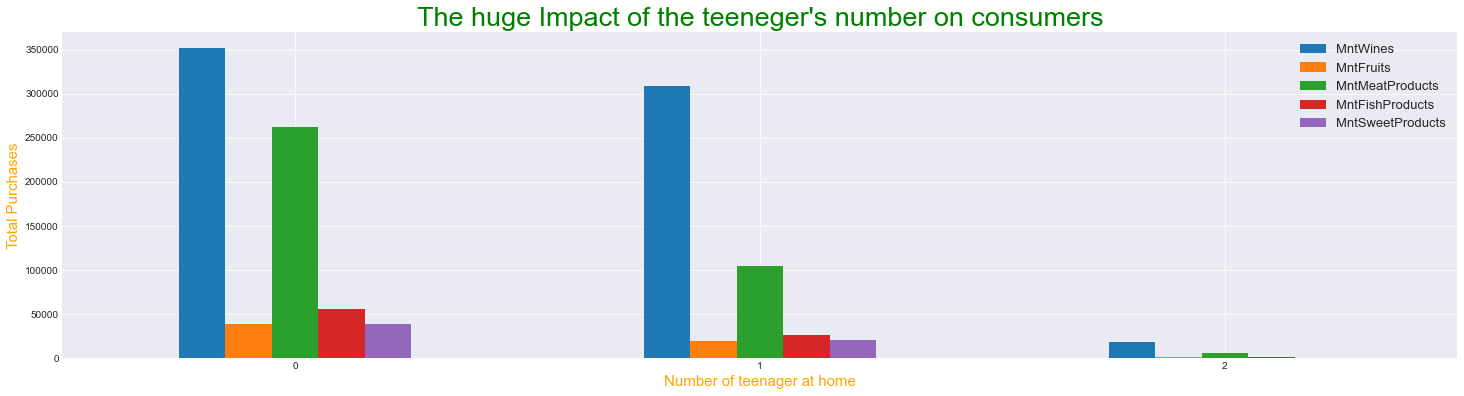

In [56]:
teen.plot.bar(figsize = [25,6])
plt.xticks(rotation = 360)
plt.xlabel('Number of teenager at home', size = 15, color = 'orange')
plt.ylabel('Total Purchases', size = 15, color = 'orange')
plt.legend(fontsize = 13)
plt.title('The huge Impact of the teeneger\'s number on consumers', size = 27, color = 'green');

In [53]:
df_teen = data.groupby('Teenhome')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum().reset_index()
df_teen['Total'] = df_teen[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].apply(sum, axis = 1)
df_teen

,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Total
0,0,352215,38423,262435,56235,38877,748185
1,1,309002,19433,104470,26461,20840,480206
2,2,18821,911,6488,1243,836,28299


**Conclusion:** As for children, we can observe that the number of teenagers also plays a role in consumer purchases. However, we see that customers without teenagers consume much less than people without children (to see if customers without teenagers also have no children) .

# Analysis report

* **Age** - The mean/median age of people who answer positively is similar to those who answer negatively and is 53-54 years old.
* **Purchases by category** - We can see that at first glance those who have made the most purchases are those who are most likely to join a Gold card.
     * The most interesting value is about those who have made a purchase through the catalog: Those who join the 'Gold' project are those who have a median of 4 purchases on this platform against those who have not joined who have a median of 1 purchase to their credit.
     * The second category that could be interesting would be that of purchases made via the company's website. Those who join the 'Gold' project are those who have made a median of 5 purchases on this platform against those who have not joined who have a median of 3 purchases to their credit.
     * There is finally the last category (Number of purchases made at the company store), where in my opinion no conclusion is possible because, not containing outliers, the average is therefore a good metric of evaluation and their score is almost identical in both cases (5.74 for 6.09).
* **Complain / Purchase**: We can see that those who complained still purchased products and the number of purchases they made is very similar to those who did not complain (it seems that people's complaints have no influence on their future purchase)
* **Complain/Response** We were able to use the `pearson` statistical test and observe that we have no correlation between the `complain` variable and the `response` variable. Which means just because people complain doesn't mean they won't buy into the 'Gold' project.
* **Dt_Customer / Purchase:**
    * We see that the month of August (we can also include the months October, January and December) is a month where customers make the most purchases. It would therefore be interesting to offer the 'Gold' offer in one of these months (months to avoid: June - July).
    * We can see that customers who signed up in 2013 have more than twice as many orders in their assets as those who signed up in 2012 or 2014
* **MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts:**
     * We note that wines are by far the most purchased products followed by meat (almost twice a month) followed by far by fish, sweet products and fruits.
     * We see that those who joined the 'Gold' project follow the logic of the biggest buyers. That is to say it is the consumers of wine in the first place then those of meat...
* **Income / Response:**
     * We see that the people who have the most substantial income are those who have subscribed to the 'Gold' project. On average, people with incomes over $64,000 are more likely to join. **Beware, however, of this conclusion and the extreme values because, for example, the person with the highest income from this table has not taken out a subscription.**
     * We see that people with high incomes have the most purchases under their belt.
* **Kidhome / MntProducts:**
     * We see that there is a huge impact that the number of children creates on customer purchases. Customers without children make up 70% of total purchases! Those with 1 child make up 28% of the total, while those with 2 children make up **only** 1.4% of the total!
     * As for children, we can observe that the number of teenagers also plays a role in consumer purchases. However, we see that customers without teenagers consume much less than people without children (to see if customers without teenagers also have no children) .